# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import pandas as pd
from sklearn.linear_model import Perceptron

# Functions

In [3]:
def train_perceptron(x: np.ndarray, alpha: float, tal: float):
    '''
        x (np.ndarray): represent the inputs of the neuron
        alpha (float): represent the learning ratio 
    '''
    
    W = np.random.randn(3, 1)
    cont = 0
    Y = [1]

    while len(Y) != 0:
        Y = []
        tall = []
        for k in range(x.shape[1]):
            if tal[k] * np.dot(W.T, x[:, k]) > 0:
                cont += 1
                Y.append(x[:, k])
                tall.append(tal[k])
        
        Y = np.array(Y).T if Y else np.array([])
        tall = np.array(tall).reshape(-1, 1) if tall else np.array([])

        if Y.size == 0:
            W = W
        else:
            W = W - passo * np.dot(Y, tall)

    u2 = np.arange(-4, 10, 0.1)
    u1 = (-W[1] / W[0]) * u2 - (W[2] / W[0])
    
    plt.figure(figsize=(12, 6))
    plt.plot(u1, u2, 'g--', label="Perceptron Classificator")
    plt.scatter(train_c1.T[0], train_c1.T[1], color='red')
    plt.scatter(train_c2.T[0], train_c2.T[1], color='blue')
    plt.title('Area Separation of Bayes to 2 Classes')
    plt.xlabel('u1')
    plt.ylabel('u2')

    return W

def train_perceptron_square_error(W: np.ndarray, b: np.ndarray, 
                      X: np.ndarray, yd: np.ndarray,  
                      alpha: float, epochs: int, 
                      tol: float):
    '''
        W (np.ndarray): represent the weights of the neuron
        b (np.ndarray): represent the bias of the neuron
        X (np.ndarray): represent the inputs of the neuron
        yd (np.ndarray): represent the expected results (labels)
        alpha (float): represent the learning ratio 
        epochs (int): represent the max epochs for traning the model
        tol (float): represent the error tolerance
    '''
    
    N = X.shape[1]
    SSE = tol
    SSE_array = list()

    for epoch in range(1, epochs+1, 1):
        if SSE < tol:
            break
        
        SSE = 0
        
        for i in range(N):
            result = np.dot(W, X.T[i]) + b
            y = [1 if v >= 0 else 0 for v in result[0]]
            erro = yd[0][i] - y
            W += alpha*erro*X.T[i]
            b += alpha*erro
            SSE += erro**2
            
        SSE_array.append(float(SSE[0]))

    u2 = np.arange(-4, 10, 0.1)
    u1 = (-W[0][1] / W[0][0]) * u2 - (b[0][0] / W[0][0])
    
    plt.figure(figsize=(12, 6))
    plt.plot(u1, u2, 'g--', label="Perceptron Classificator")
    plt.scatter(train_c1.T[0], train_c1.T[1], color='red')
    plt.scatter(train_c2.T[0], train_c2.T[1], color='blue')
    plt.title('Area Separation of Bayes to 2 Classes')
    plt.xlabel('u1')
    plt.ylabel('u2')
    
    return W, b, SSE_array


def gaussian_pdf(x, mean, cov):
    k = len(cov) 

    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    
    norm_const = 1 / ((2 * np.pi) ** (k / 2) * det_cov ** 0.5)
    
    x_diff = x - mean

    result_exponent = np.array([np.exp(-0.5 * np.dot(x.T, np.dot(inv_cov, x))) for x in x_diff])
    return norm_const * result_exponent

def bayes_discriminant(x, mean_C1, cov_C1, mean_C2, cov_C2):
    return gaussian_pdf(x, mean_C2, cov_C2) - gaussian_pdf(x, mean_C1, cov_C1)


def plot_bayes(mean_C1, zeta_C1, mean_C2, zeta_C2):
    x_min, x_max = -9, 10
    y_min, y_max = -4, 10   
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]

    discriminant_values_bayes = bayes_discriminant(grid, mean_C1, zeta_C1, mean_C2, zeta_C2)
    discriminant_values_bayes = discriminant_values_bayes.reshape(xx.shape)

    plt.contourf(xx, yy, discriminant_values_bayes, levels=[-np.inf, 0, np.inf], alpha=0.3, colors=['red', 'blue'])
    plt.grid()
    plt.legend()
    plt.show()

# Execute

- Para os próximos exercícios, use a base de dados criada na resolução da Lista 1.

In [4]:
samples_C1 = np.loadtxt('data/samples_C1.txt', delimiter=',')
samples_C2 = np.loadtxt('data/samples_C2.txt', delimiter=',')

train_c1, test_c1 = samples_C1[:300], samples_C1[300:]
train_c2, test_c2 = samples_C2[:300], samples_C2[300:]
bias = np.ones(600).reshape((600,1))

## Step 1
- Projete o classificador perceptron utilizando o algoritmo visto nos slides da Aula 2, utilizando o conjunto de treinamento. Anote o resultado, g(x), e plote a reta de separação, comparando com o classificador de Bayes para o banco de teste. 

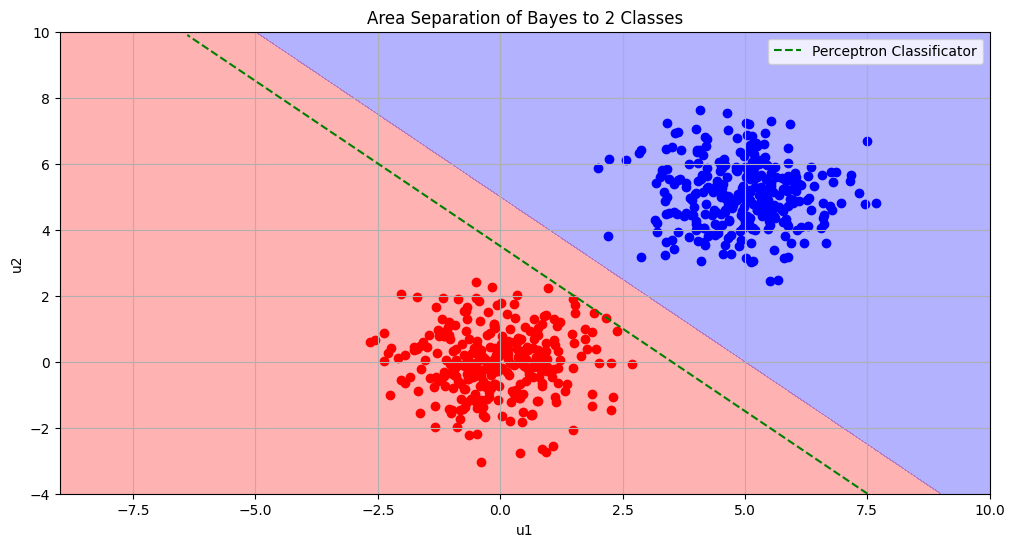

The Perceptron Function develop is aprox.: g(x) = 209.487 * X1 + 209.425 * X2 -734.258


In [31]:
x = np.concatenate((train_c1, train_c2), axis=0)
x = np.concatenate((x, bias), axis=1)
x = x.T
tal = np.concatenate((np.ones((300)), -np.ones((300))))
passo = 0.7

W = train_perceptron(x=x, alpha=passo, tal=tal)
mean_C1 = np.array([0, 0])            # Mean values for C1
zeta_C1 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C1
mean_C2 = np.array([5, 5])            # Mean values for C2
zeta_C2 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C2
plot_bayes(mean_C1, zeta_C1, mean_C2, zeta_C2)
print(f'The Perceptron Function develop is aprox.: g(x) = {round(W[0][0], 3)} * X1 + {round(W[1][0], 3)} * X2 {round(W[2][0], 3)}')

## Step 2
- Utilizando agora apenas 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador perceptron. Anote o resultado e plote a reta de separação, comparando com o classificador de Bayes (a reta de separação deve ser plotada considerando todos os eventos de teste). 

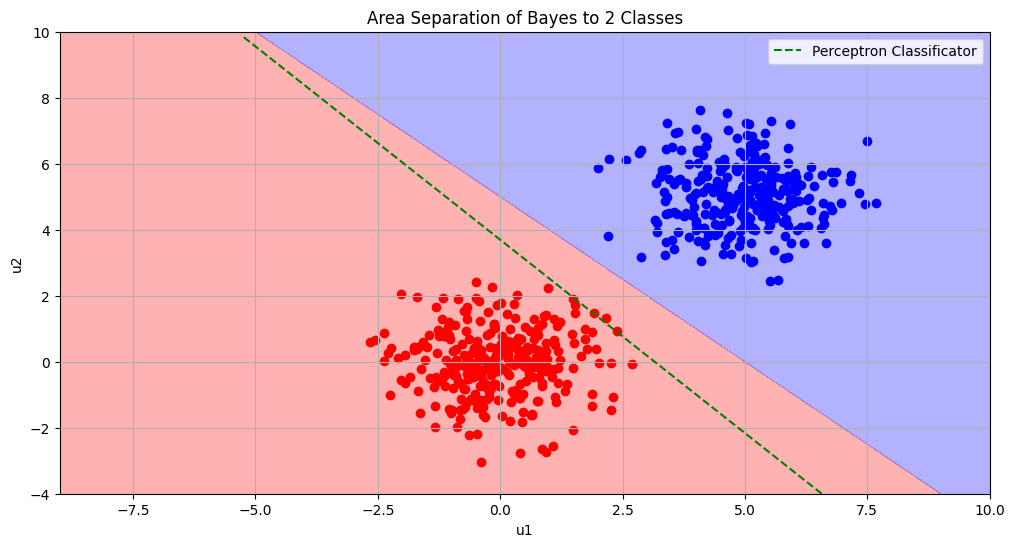

The Perceptron Function develop is aprox.: g(x) = 43.635 * X1 + 37.239 * X2 -137.67


In [34]:
train_c1_2, train_c2_2 = train_c1[:50], train_c2[:50]
bias_2 = np.ones(100).reshape((100,1))
x = np.concatenate((train_c1_2, train_c2_2), axis=0)
x = np.concatenate((x, bias_2), axis=1)
x = x.T
tal = np.concatenate((np.ones((50)), -np.ones((50))))
passo = 0.7

W = train_perceptron(x=x, alpha=passo, tal=tal)
mean_C1 = np.array([0, 0])            # Mean values for C1
zeta_C1 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C1
mean_C2 = np.array([5, 5])            # Mean values for C2
zeta_C2 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C2
plot_bayes(mean_C1, zeta_C1, mean_C2, zeta_C2)
print(f'The Perceptron Function develop is aprox.: g(x) = {round(W[0][0], 3)} * X1 + {round(W[1][0], 3)} * X2 {round(W[2][0], 3)}')

## Step 3
- Utilizando agora outros 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador perceptron. Anote o resultado e plote a reta de separação, comparando com o classificador de Bayes (a reta de separação deve ser plotada considerando todos os eventos de teste). 


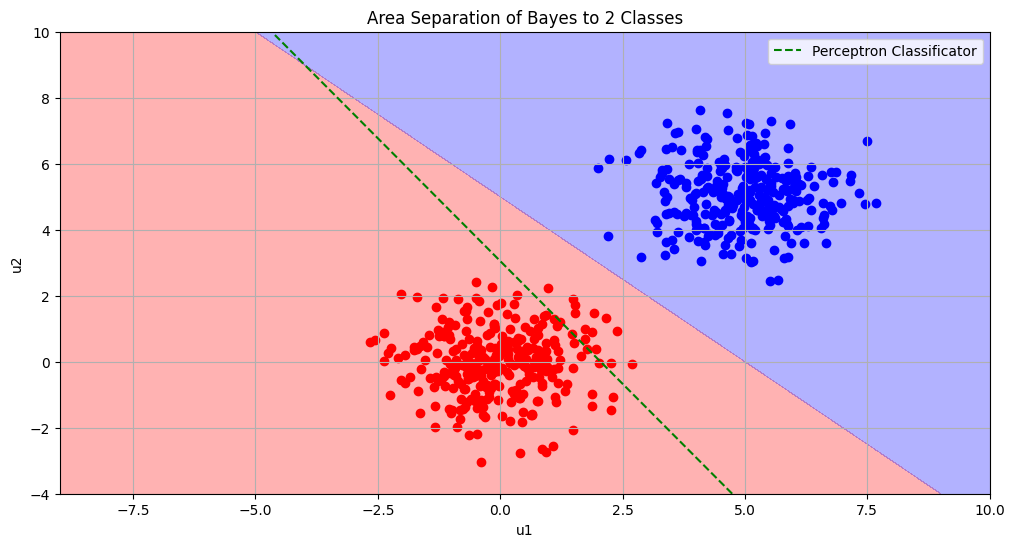

The Perceptron Function develop is aprox.: g(x) = 30.352 * X1 + 20.398 * X2 -62.261


In [37]:
train_c1_2, train_c2_2 = train_c1[150:200], train_c2[150:200]
bias_2 = np.ones(100).reshape((100,1))
x = np.concatenate((train_c1_2, train_c2_2), axis=0)
x = np.concatenate((x, bias_2), axis=1)
x = x.T
tal = np.concatenate((np.ones((50)), -np.ones((50))))
passo = 0.7

W = train_perceptron(x=x, alpha=passo, tal=tal)
mean_C1 = np.array([0, 0])            # Mean values for C1
zeta_C1 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C1
mean_C2 = np.array([5, 5])            # Mean values for C2
zeta_C2 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C2
plot_bayes(mean_C1, zeta_C1, mean_C2, zeta_C2)
print(f'The Perceptron Function develop is aprox.: g(x) = {round(W[0][0], 3)} * X1 + {round(W[1][0], 3)} * X2 {round(W[2][0], 3)}')

## Step 4

-  Projete o classificador baseado na minimização do erro ao quadrado (algoritmo com aproximação estocástica), utilizando o conjunto de treinamento. Anote o resultado e plote a reta de separação, comparando com o classificador de Bayes. Considere os dados de teste para fazer as comparações de resultado. 


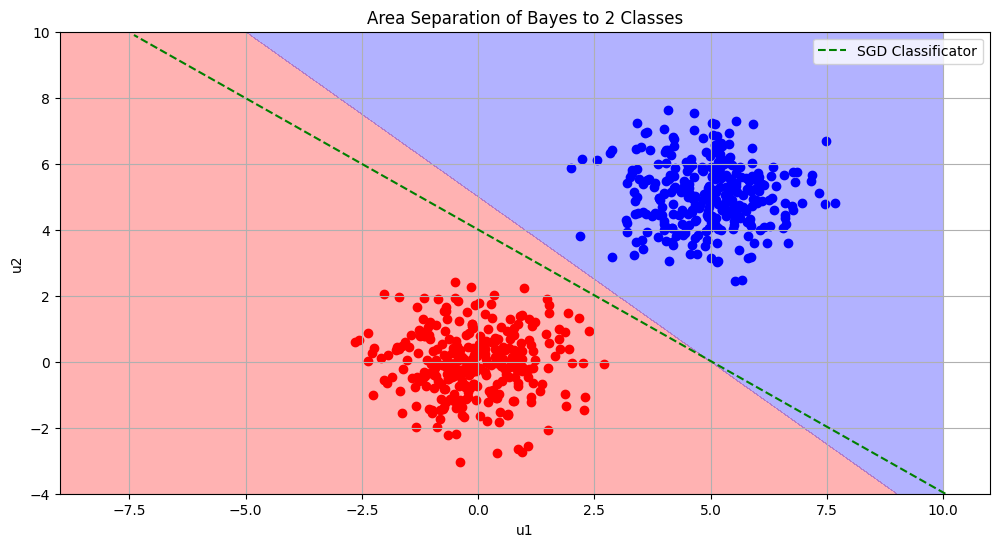

The Least Squares Function using SGD is approximately: g(x) = -0.168 * X1 + -0.211 * X2 + 0.846


In [93]:
X = np.concatenate((train_c1, train_c2), axis=0)
bias = np.ones(600).reshape((600, 1))
X = np.concatenate((X, bias), axis=1) 
yd = np.concatenate((np.ones(300), -np.ones(300)), axis=0).reshape((600, 1))

W = np.random.randn(X.shape[1], 1)

alpha = 0.01
epochs = 100

for epoch in range(epochs):
    for i in range(X.shape[0]):

        xi = X[i].reshape(1, -1)            
        y = xi @ W
        error = y - yd[i]
        W -= alpha * xi.T @ error    

u2 = np.arange(-4, 10, 0.1)
u1 = (-W[1] / W[0]) * u2 - (W[2] / W[0])

plt.figure(figsize=(12, 6))
plt.plot(u1, u2, 'g--', label="SGD Classificator")
plt.scatter(train_c1.T[0], train_c1.T[1], color='red')
plt.scatter(train_c2.T[0], train_c2.T[1], color='blue')
plt.title('Area Separation of Bayes to 2 Classes')
plt.xlabel('u1')
plt.ylabel('u2')

mean_C1 = np.array([0, 0])            # Mean values for C1
zeta_C1 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C1
mean_C2 = np.array([5, 5])            # Mean values for C2
zeta_C2 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C2
plot_bayes(mean_C1, zeta_C1, mean_C2, zeta_C2)

print(f'The Least Squares Function using SGD is approximately: g(x) = {round(W[0][0], 3)} * X1 + {round(W[1][0], 3)} * X2 + {round(W[2][0], 3)}')


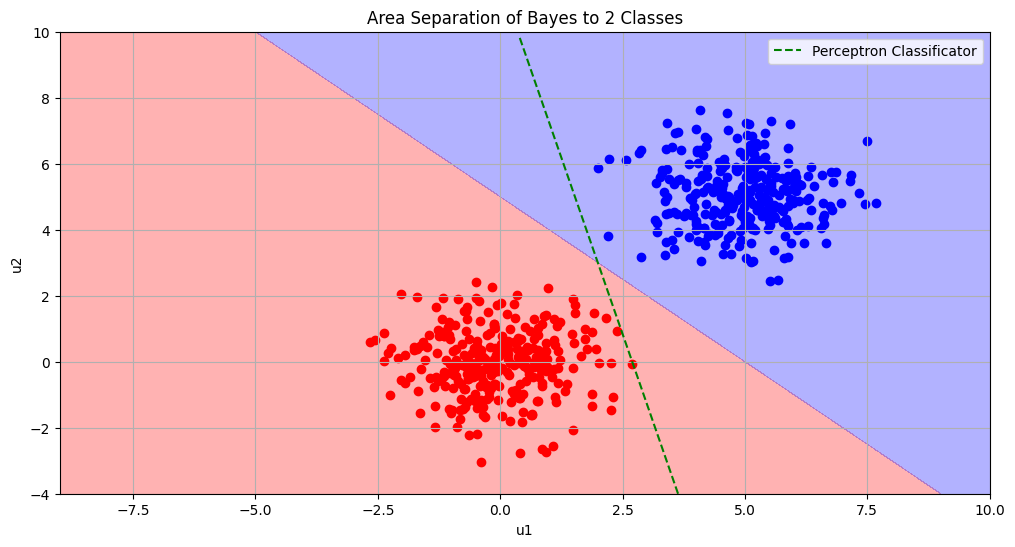

The Perceptron Function develop is aprox.: g(x) = 0.959 * X1 + 0.224 * X2 -2.586


In [73]:
W = np.array(np.random.rand(1, 2))*2 - 1
b = np.array(np.random.rand(1, 1))*2 - 1
X = np.concatenate((train_c1, train_c2), axis=0).T
yd = np.concatenate((np.zeros(300), np.ones(300)), axis=0).reshape((1, 600))
alpha = 1.2
tol = 0.001
epochs = 10

W, b, VetorSEQ = train_perceptron_square_error(W, b, X, yd, alpha, epochs, tol)

mean_C1 = np.array([0, 0])            # Mean values for C1
zeta_C1 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C1
mean_C2 = np.array([5, 5])            # Mean values for C2
zeta_C2 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C2
plot_bayes(mean_C1, zeta_C1, mean_C2, zeta_C2)
print(f'The Perceptron Function develop is aprox.: g(x) = {round(W[0][0], 3)} * X1 + {round(W[0][1], 3)} * X2 {round(b[0][0], 3)}')

## Step 5
- Projete o classificador baseado na minimização do erro ao quadrado (algoritmo da pseudo inversa), utilizando o conjunto de treinamento. Anote o resultado e plote a reta de separação, comparando com o classificador de Bayes. Considere os dados de teste para fazer as comparações de resultado.

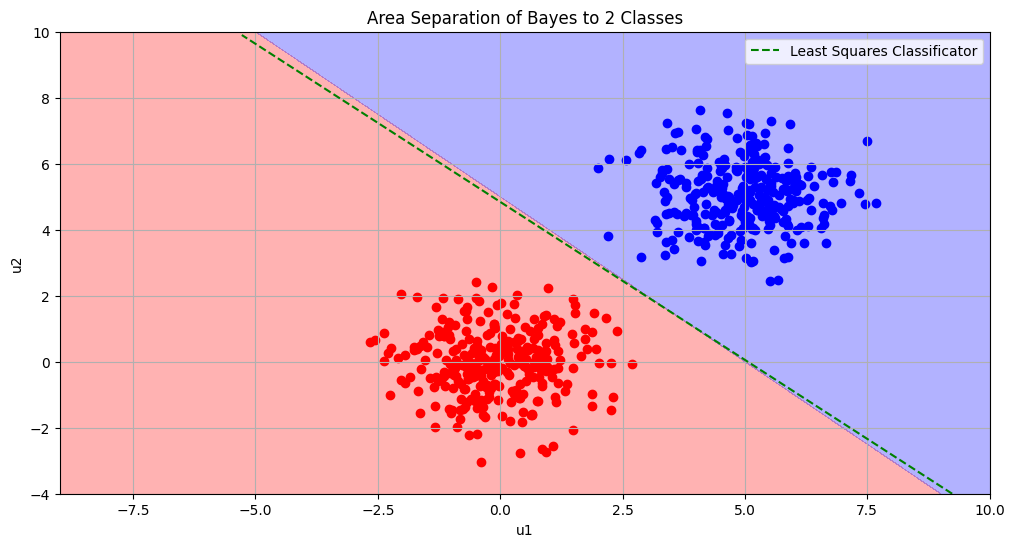

The Least Squares Function develop is aprox.: g(x) = -0.18 * X1 + -0.188 * X2 +0.909


In [85]:
X = np.concatenate((train_c1, train_c2), axis=0)
bias = np.ones(600).reshape((600,1))
X = np.concatenate((X, bias), axis=1)
yd = np.concatenate((np.ones(300), - np.ones(300)), axis=0).reshape((600, 1))

# Pseudo Inversa
W = np.linalg.inv(X.T@X)@ X.T@yd

u2 = np.arange(-4, 10, 0.1)
u1 = (-W[1] / W[0]) * u2 - (W[2] / W[0])

plt.figure(figsize=(12, 6))
plt.plot(u1, u2, 'g--', label="Least Squares Classificator")
plt.scatter(train_c1.T[0], train_c1.T[1], color='red')
plt.scatter(train_c2.T[0], train_c2.T[1], color='blue')
plt.title('Area Separation of Bayes to 2 Classes')
plt.xlabel('u1')
plt.ylabel('u2')


mean_C1 = np.array([0, 0])            # Mean values for C1
zeta_C1 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C1
mean_C2 = np.array([5, 5])            # Mean values for C2
zeta_C2 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C2
plot_bayes(mean_C1, zeta_C1, mean_C2, zeta_C2)
print(f'The Least Squares Function develop is aprox.: g(x) = {round(W[0][0], 3)} * X1 + {round(W[1][0], 3)} * X2 +{round(W[2][0], 3)}')

## Step 6
- Utilizando agora apenas 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador MSE (pseudo-inversa). Anote o resultado e plote a reta de separação, comparando com o classificador de Bayes (a reta de separação deve ser plotada considerando todos os eventos do banco de dados de teste). 

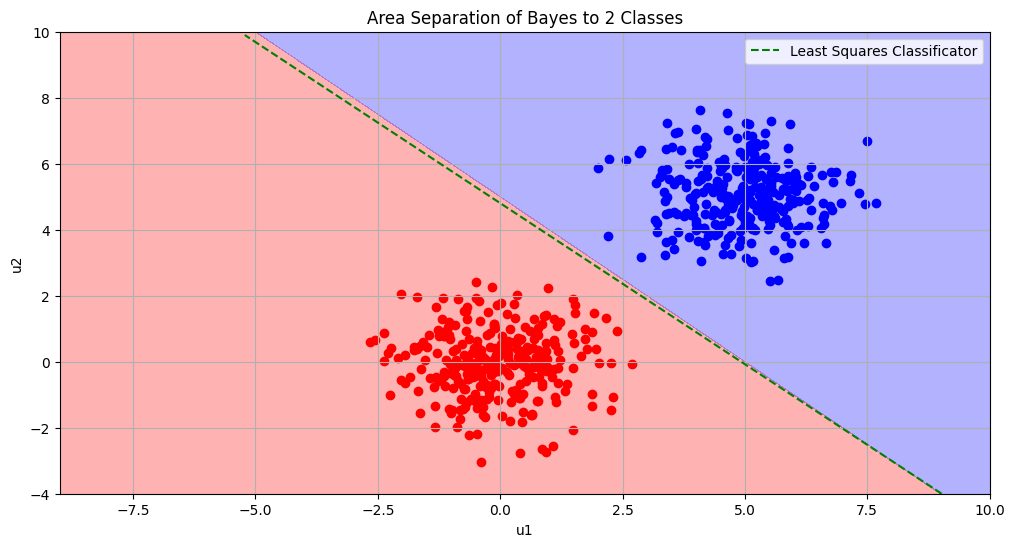

The Least Squares Function develop is aprox.: g(x) = -0.177 * X1 + -0.181 * X2 +0.872


In [91]:
train_c1_2, train_c2_2 = train_c1[150:200], train_c2[150:200]
bias_2 = np.ones(100).reshape((100,1))

X = np.concatenate((train_c1_2, train_c2_2), axis=0)
X = np.concatenate((X, bias_2), axis=1)
yd = np.concatenate((np.ones(50), - np.ones(50)), axis=0).reshape((100, 1))


# Pseudo Inversa
W = np.linalg.inv(X.T@X)@ X.T@yd

u2 = np.arange(-4, 10, 0.1)
u1 = (-W[1] / W[0]) * u2 - (W[2] / W[0])

plt.figure(figsize=(12, 6))
plt.plot(u1, u2, 'g--', label="Least Squares Classificator")
plt.scatter(train_c1.T[0], train_c1.T[1], color='red')
plt.scatter(train_c2.T[0], train_c2.T[1], color='blue')
plt.title('Area Separation of Bayes to 2 Classes')
plt.xlabel('u1')
plt.ylabel('u2')


mean_C1 = np.array([0, 0])            # Mean values for C1
zeta_C1 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C1
mean_C2 = np.array([5, 5])            # Mean values for C2
zeta_C2 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C2
plot_bayes(mean_C1, zeta_C1, mean_C2, zeta_C2)
print(f'The Least Squares Function develop is aprox.: g(x) = {round(W[0][0], 3)} * X1 + {round(W[1][0], 3)} * X2 +{round(W[2][0], 3)}')

## Step 7
- Utilizando agora outros 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador baseado na minimização do erro ao quadrado (algoritmo com aproximação estocástica). Anote o resultado e plote a reta de separação, comparando com o classificador de Bayes (a reta de separação deve ser plotada considerando todos os eventos do banco de dados de teste).

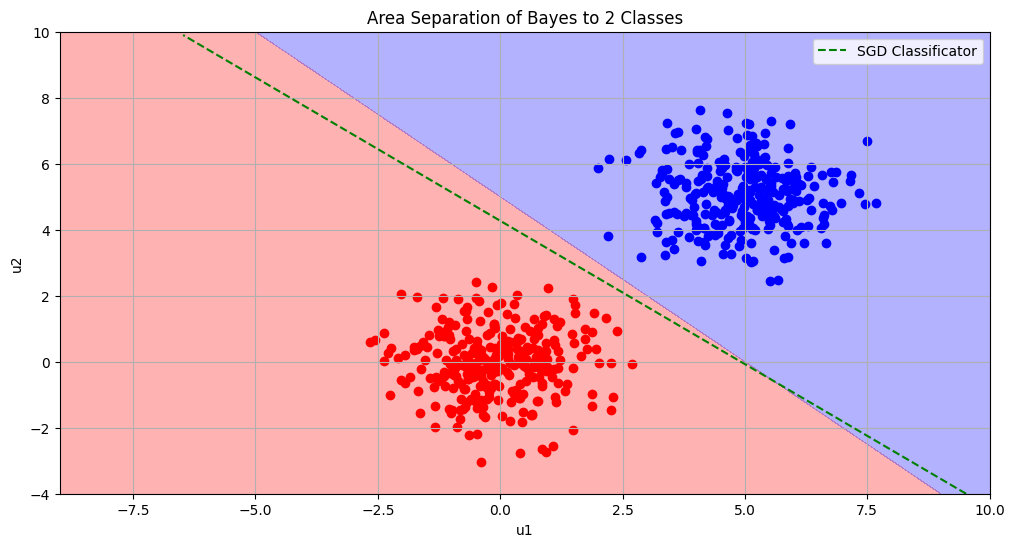

The Least Squares Function using SGD is approximately: g(x) = -0.176 * X1 + -0.202 * X2 + 0.864


In [7]:
train_c1_2, train_c2_2 = train_c1[150:200], train_c2[150:200]
bias_2 = np.ones(100).reshape((100,1))

X = np.concatenate((train_c1_2, train_c2_2), axis=0)
X = np.concatenate((X, bias_2), axis=1) 
yd = np.concatenate((np.ones(50), -np.ones(50)), axis=0).reshape((100, 1))

W = np.random.randn(X.shape[1], 1)

alpha = 0.01
epochs = 100

for epoch in range(epochs):
    for i in range(X.shape[0]):

        xi = X[i].reshape(1, -1)            
        y = xi @ W
        error = y - yd[i]
        W -= alpha * xi.T @ error    

u2 = np.arange(-4, 10, 0.1)
u1 = (-W[1] / W[0]) * u2 - (W[2] / W[0])

plt.figure(figsize=(12, 6))
plt.plot(u1, u2, 'g--', label="SGD Classificator")
plt.scatter(train_c1.T[0], train_c1.T[1], color='red')
plt.scatter(train_c2.T[0], train_c2.T[1], color='blue')
plt.title('Area Separation of Bayes to 2 Classes')
plt.xlabel('u1')
plt.ylabel('u2')

mean_C1 = np.array([0, 0])            # Mean values for C1
zeta_C1 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C1
mean_C2 = np.array([5, 5])            # Mean values for C2
zeta_C2 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C2
plot_bayes(mean_C1, zeta_C1, mean_C2, zeta_C2)

print(f'The Least Squares Function using SGD is approximately: g(x) = {round(W[0][0], 3)} * X1 + {round(W[1][0], 3)} * X2 + {round(W[2][0], 3)}')


## Step 8
- Discuta sobre a capacidade de separação alcançada pelos métodos. 